In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from thesis_toolbox.plot.plot_climatology import plot_climatology_500hpa
from thesis_toolbox.plot.tools import map_large_scale, add_letter, add_colorbar
from thesis_toolbox.process_era5 import resample_seasonal
import numpy as np
from thesis_toolbox.composites.create_composites import detrend_timeseries,select_years_to_composite
from thesis_toolbox.composites.setup_thesis_data import mslp_wind_composite
from thesis_toolbox.plot.plot_composites import plot_mslp_850hpa_composite, plot_which_years_composited
from thesis_toolbox.utils import get_locations_CLP,read_receptor_composite
import glob
import matplotlib as mpl
%matplotlib inline

In [2]:
if 'snakemake' in globals():
    to_file = True
    path='./'
    oro=snakemake.input.oro
    kind = snakemake.wildcards.kind
else:
    path = '../../../'
    to_file= False
    oro = '../../../downloads/ERA5_orography.nc'
    kind='total_deposition'

In [3]:
def plot_composite(composite,ax, loc_name, loc_df, scale=0.5, u=2,oro=oro):
    plot_mslp_850hpa_composite(composite, ax=ax,  x_qk=0.81, y_qk=.92, receptor_loc=loc_df.loc[loc_name,:].to_list(), 
                               receptor_name=loc_name
                          , vector_scale=scale,angles='uv', colorbar=False, U=u, oro=oro, hatches='xxx', hatch_color='dimgrey')
    if loc_name=='BADOE':
        loc_name='BAODE'
    ax.set_title(loc_name)
    ax.tick_params(axis="both", which='major',  labelsize=8)



## 20 micron total depostion DJF composite

In [4]:
locs_df = get_locations_CLP().drop('YINCHUAN')


DJF_20mu_composite = read_receptor_composite(['SHAPOTOU','BADOE','LUOCHUAN','SACOL','LANTIAN','LINGTAI'], 
                                             path, 'msl_pressure_wind_850hPa', '20micron','DJF', std='4_rank', kind=kind)


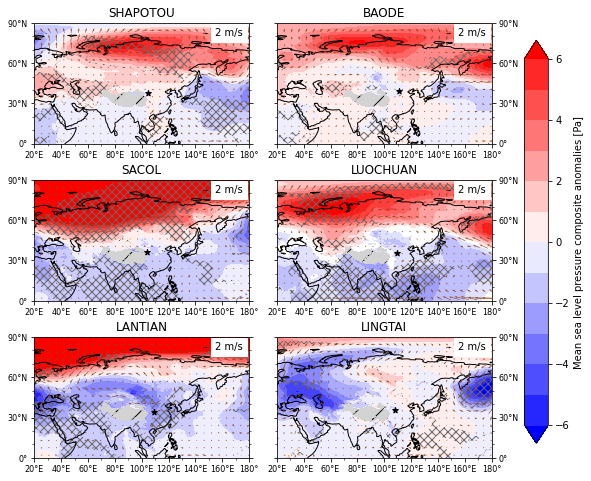

In [5]:
fig,axes = plt.subplots(nrows=3, ncols=2,subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(8.3, 8))
locs = ['SHAPOTOU','BADOE','SACOL','LUOCHUAN','LANTIAN','LINGTAI']
i=0
for ax ,loc_name in zip(axes.ravel(),locs):
    plot_composite(DJF_20mu_composite,ax,loc_name,locs_df, oro=oro)
    ax.tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)
    if i in (1,3,5):
        ax.tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True)
    i+=1

ax = axes.ravel()


fig.subplots_adjust(hspace=0.3, wspace=0.1)

cax = fig.add_axes([0.95, 0.15,0.04,0.7])
cmap = mpl.cm.bwr
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.arange(-6,7,1),cmap.N, extend='both'), 
                                          cmap=cmap),cax=cax, extend='both', orientation='vertical', 
            label='Mean sea level pressure composite anomalies [Pa]')
if to_file:
    plt.savefig(snakemake.output.silt_composite_path_djf, bbox_inches='tight')

## 2micron total depostion composite mslp 850 hpa winds DJF

In [6]:
locs = get_locations_CLP().drop('YINCHUAN')

DJF_2mu_composite = read_receptor_composite(locs.index, path, 'msl_pressure_wind_850hPa', '2micron','DJF', std='4_rank', kind=kind)

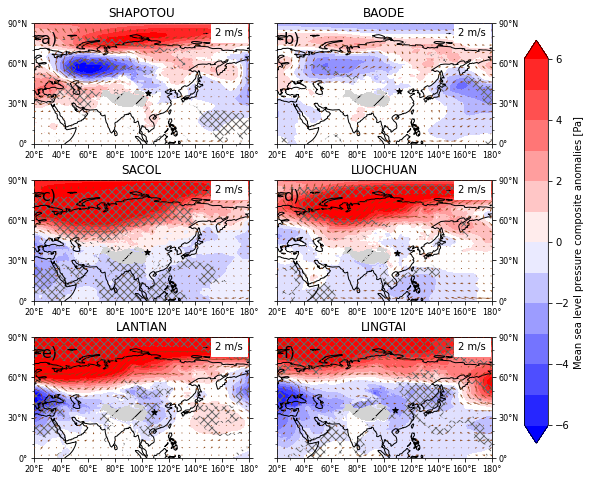

In [7]:
fig,axes = plt.subplots(nrows=3, ncols=2,subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(8.3, 8))
locs = ['SHAPOTOU','BADOE','SACOL','LUOCHUAN','LANTIAN','LINGTAI']
i=0
for ax ,loc_name in zip(axes.ravel(),locs):
    plot_composite(DJF_2mu_composite,ax,loc_name,locs_df, oro=oro)
    ax.tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)
    if i in (1,3,5):
        ax.tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True)
    i+=1

ax = axes.ravel()

add_letter(ax, y=0.83)
fig.subplots_adjust(hspace=0.3, wspace=0.1)

cax = fig.add_axes([0.95, 0.15,0.04,0.7])
cmap = mpl.cm.bwr
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.arange(-6,7,1),cmap.N, extend='both'), 
                                          cmap=cmap),cax=cax, extend='both', orientation='vertical', 
            label='Mean sea level pressure composite anomalies [Pa]')
if to_file:
    plt.savefig(snakemake.output.clay_composite_path_djf, bbox_inches='tight')

## 20 micron MAM 850 hPA and winds

In [8]:

locs = get_locations_CLP().drop('YINCHUAN')

MAM_20mu_composite = read_receptor_composite(locs.index, path, 'msl_pressure_wind_850hPa', '20micron','MAM', std='4_rank', kind=kind)

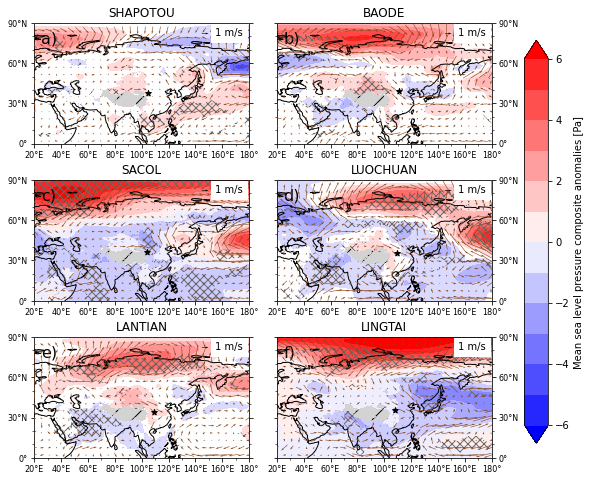

In [9]:
fig,axes = plt.subplots(nrows=3, ncols=2,subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(8.3, 8))
locs = ['SHAPOTOU','BADOE','SACOL','LUOCHUAN','LANTIAN','LINGTAI']
i=0
for ax ,loc_name in zip(axes.ravel(),locs):
    plot_composite(MAM_20mu_composite,ax,loc_name,locs_df,u=1, scale=0.2)
    ax.tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)
    if i in (1,3,5):
        ax.tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True)
    i+=1

ax = axes.ravel()
add_letter(ax, y=0.83)
fig.subplots_adjust(hspace=0.3, wspace=0.1)

cax = fig.add_axes([0.95, 0.15,0.04,0.7])
cmap = mpl.cm.bwr
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.arange(-6,7,1),cmap.N, extend='both'), 
                                          cmap=cmap),cax=cax, extend='both', orientation='vertical', 
            label='Mean sea level pressure composite anomalies [Pa]')
if to_file:
    plt.savefig(snakemake.output.silt_composite_path_mam, bbox_inches='tight')

## 2micron 850hPa wind and mslp MAM

In [10]:

MAM_2mu_composite = read_receptor_composite(locs_df.index, path, 'msl_pressure_wind_850hPa', '2micron','MAM', std='4_rank', kind=kind)


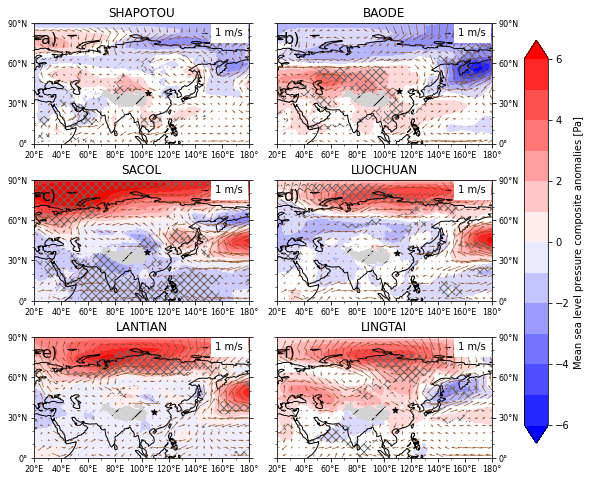

In [11]:
fig,axes = plt.subplots(nrows=3, ncols=2,subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(8.3, 8))
locs = ['SHAPOTOU','BADOE','SACOL','LUOCHUAN','LANTIAN','LINGTAI']
i=0
for ax ,loc_name in zip(axes.ravel(),locs):
    plot_composite(MAM_2mu_composite,ax,loc_name,locs_df, u=1, scale=.2)
    ax.tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)
    if i in (1,3,5):
        ax.tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=True)
    i+=1

ax = axes.ravel()

add_letter(ax, y=0.83)
fig.subplots_adjust(hspace=0.3, wspace=0.1)

cax = fig.add_axes([0.95, 0.15,0.04,0.7])
cmap = mpl.cm.bwr
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.arange(-6,7,1),cmap.N, extend='both'), 
                                          cmap=cmap),cax=cax, extend='both', orientation='vertical', 
            label='Mean sea level pressure composite anomalies [Pa]')
if to_file:
    plt.savefig(snakemake.output.clay_composite_path_mam, bbox_inches='tight')